In [39]:
#Thesis: 
# web3.js .once('confirmation') causes the big performance issues
# fileNew => removed the confirmation tracking
#.once('confirmation', (confNumber, receipt) => {
#                const now = Date.now();
#                this.log(`${now} - Transaction Confirmation ${confNumber}  - ${receipt.blockNumber} - ${receipt.transactionHash}`);
#                if (this.trackPerformance) {
#                    const track = this.currentPerformanceTracks.get(receipt.transactionHash)!;
#                    track.timeConfirmed = now;
#                    track.blockNumber = receipt.blockNumber; //might overwrite if the block get's mined in another block than it got received
#                }
#                // we could figure out the confirmation time here be gather the block from the blockchain,
#                // and take the value of the blocktime.
#            })
#
# 
#.once('error', (error => {
#                this.error(`Error while sending Transaction: ${signedTransaction.transactionHash!}`, error);
#            }))

baseDir = 'data/hbbft/proofs/receipt/';

fileOld = baseDir + 'test_old_with_confirmation.transactions.csv'
fileNew = baseDir + 'test_new_without_output.transactions.csv'
# optimization without error checking.
fileNew2 = baseDir + 'test_new_without_error.transactions.csv'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# We use larger plot areas, adjust to your needs.
plt.rcParams["figure.figsize"] = (20, 10)

In [41]:

# print(filepath);
# df = pd.read_csv(filepath, header=None)
dfOld = pd.read_csv(fileOld)
dfNew = pd.read_csv(fileNew)
dfNew2 = pd.read_csv(fileNew2)

dfOld['durationSendToReceipt'] = dfOld['timeReceipt'] - dfOld['timeSend']
dfNew['durationSendToReceipt'] =  dfNew['timeReceipt'] - dfNew['timeSend']
dfNew2['durationSendToReceipt'] =  dfNew2['timeReceipt'] - dfNew2['timeSend']


# df.head()
dfNew.head()
# print(df.timeSend)
# df['before'] = df['timeSend'].shift(1)
# df['timeSinceLastSend'] = df.timeSend - df.shift(1).timeSend
# df.head()
# df.head()





,internalTxID,transactionHash,blockNumber,timeSend,timeReceipt,timeConfirmed,durationSendToReceipt
0,4,0xeae968c3f50d9f84036904c086f7f1dc5fbfe4437bd3...,9394.0,1585907240056,1.585907e+12,NaN,457.0
1,8,0x36a458c374a16e0f2380a0f41824f3f228cb514952d8...,9395.0,1585907240092,1.585907e+12,NaN,787.0
2,8,0x83eed9da359fc42a1a5f96832ec71328e1fe9edf4031...,9395.0,1585907240097,1.585907e+12,NaN,784.0
3,9,0xa8de5cd6c3f12a391c2ac8f4d1a0497408ea7e5282f1...,9395.0,1585907240100,1.585907e+12,NaN,782.0
4,11,0x6a620c4b91664e049a5ea93a173bc809b185b2f8cb4b...,9395.0,1585907240129,1.585907e+12,NaN,753.0


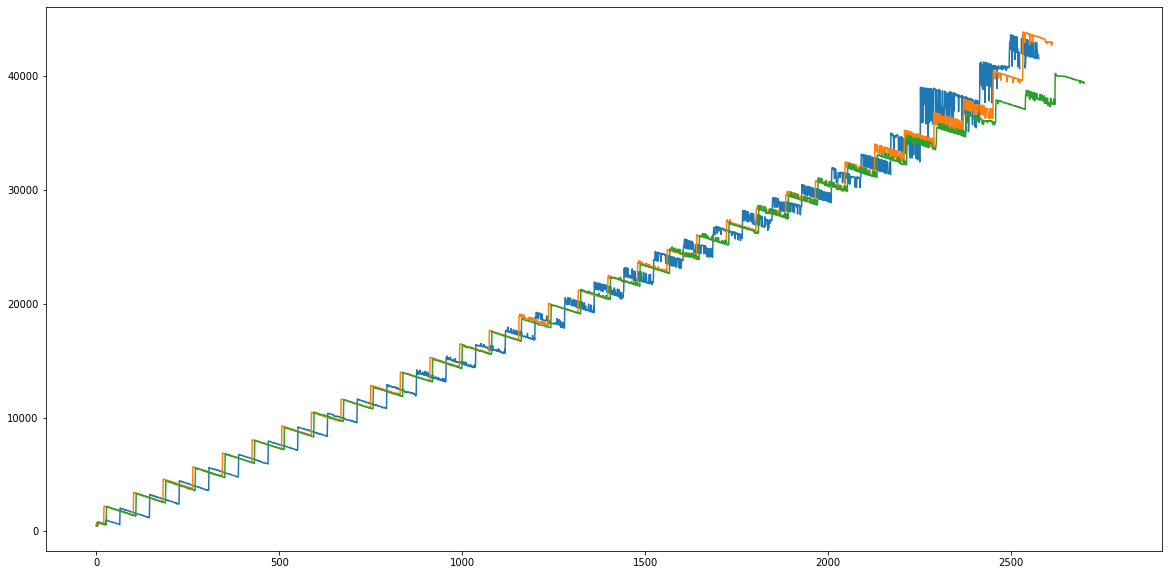

In [42]:
plt.plot(dfOld.durationSendToReceipt)
plt.plot(dfNew.durationSendToReceipt)
plt.plot(dfNew2.durationSendToReceipt)